In [80]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%config InlineBackend.print_figure_kwargs={'facecolor' : "w"}
import matplotlib as mpl

# plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.viridis(np.linspace(0,1,12)))
plt.rcParams["axes.prop_cycle"] = plt.cycler("color", plt.cm.tab10.colors)

# runstr='Dry'
# # dftab=pd.read_pickle('dfs/df_run_02_dry_delta_tab.pkl')
# dfd=pd.read_pickle('dfs/df_run_02_dry.pkl')

runstr='Wet'
dftab=pd.read_pickle('dfs/df_run_02_land_delta_tab.pkl')
# dfw=pd.read_pickle('dfs/df_run_02_land.pkl')

# dfs=[dfw,dfd]
# tits=['Wet','Dry']


In [90]:
vr=dftab['vrcol']
dPdr=dftab['dPdr']
dvrdr=dftab['dvrdr']
r=dftab['r']
P=dftab['P']


dftab['adv']=-vr * dPdr
dftab['div']=-P*100 * dvrdr
dftab['geo']=-P*100 * vr /(r*1000)
dftab['tal']=(dftab.t-dftab.tlf)*24

# tlfs=dftab.tlf.unique()

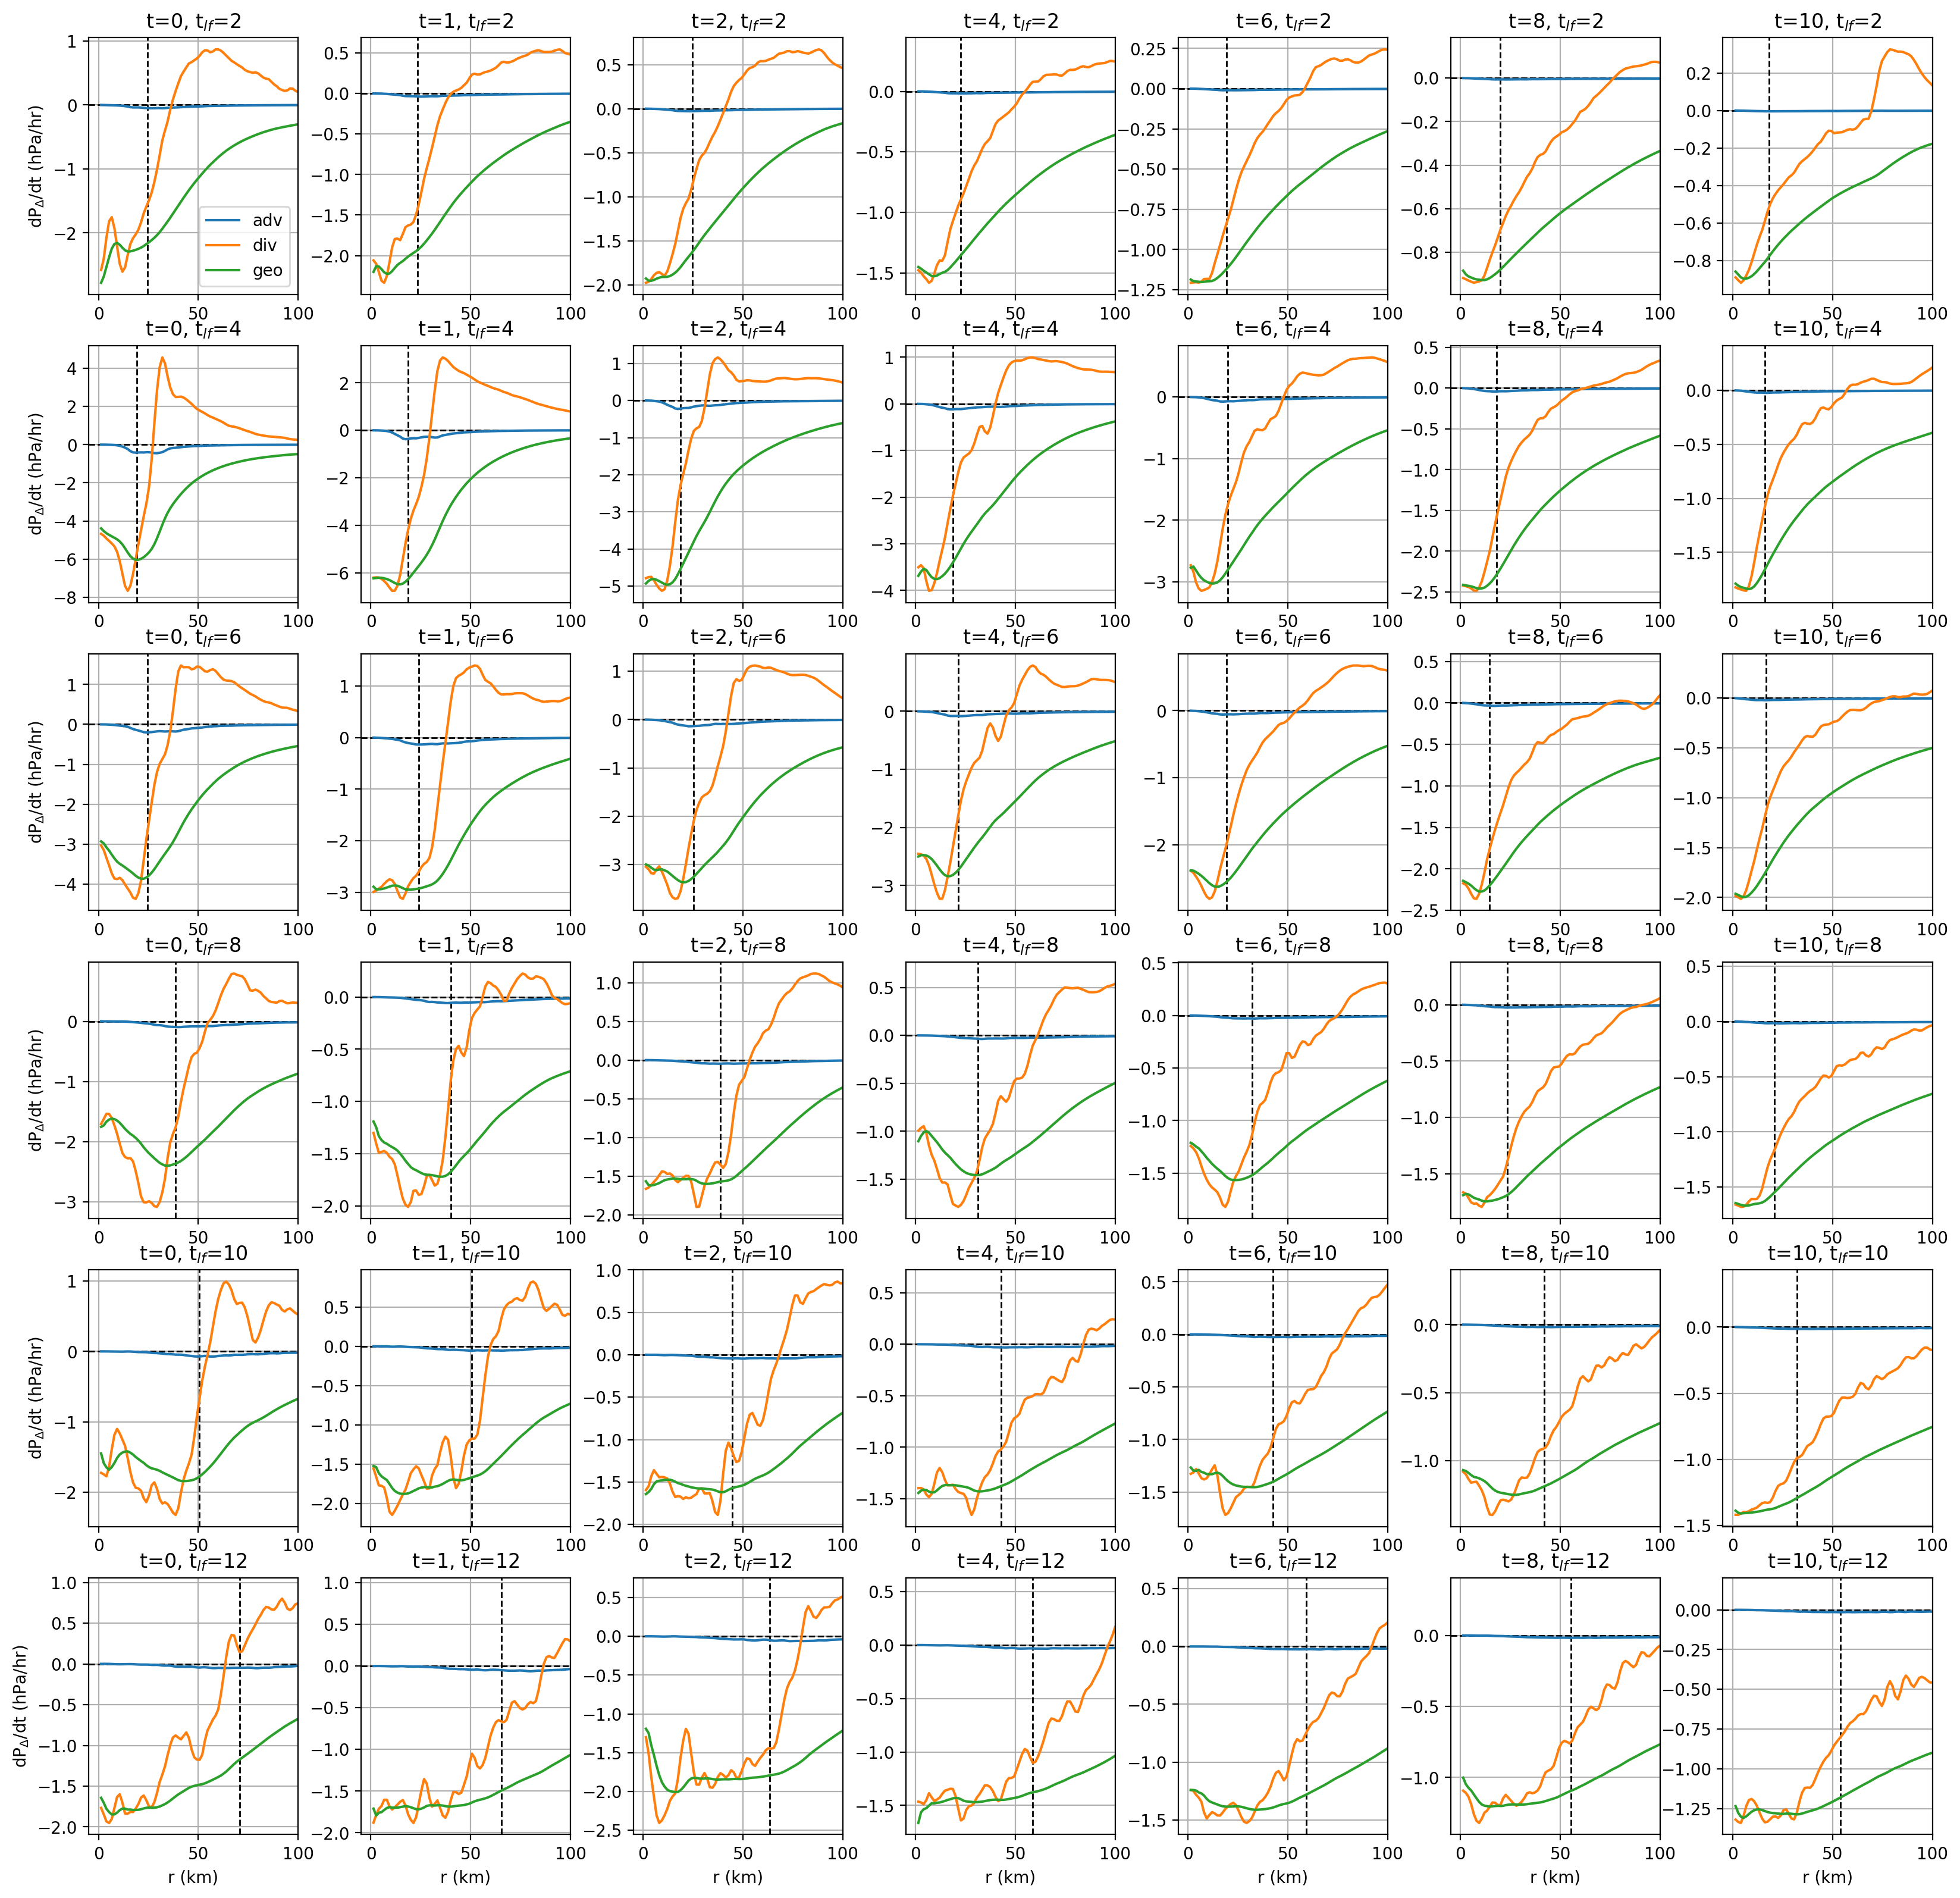

In [127]:
tlfs=[2,4,6,8,10,12]
tals=[0,1,2,4,6,8,10]

fig,axs=plt.subplots(len(tlfs),len(tals),dpi=200,figsize=(20,20))
plt.subplots_adjust(wspace=0.3)
for i,tlf in enumerate(tlfs):
    for j,tal in enumerate(tals):

        ax=axs[i,j]
        dft=dftab[dftab.tlf.eq(tlf)]
        utals=dft.tal.unique()
        df=dft[dft.tal.eq(utals[tal])]
        rmax=df.rV10max.head(1)

        uc=60*60/100
        ax.axvline(x=rmax.values,color='k',ls='--',lw=1)
        ax.axhline(y=0,color='k',ls='--',lw=1)
        h1=ax.plot(df.r,df.adv*uc)
        h2=ax.plot(df.r,df['div']*uc)
        h3=ax.plot(df.r,df.geo*uc)
        ax.grid(True)
        ax.set_xlim(-5,100)
        if i==len(tlfs)-1: ax.set_xlabel('r (km)')
        if j==0: ax.set_ylabel('dP$_\Delta$/dt (hPa/hr)')
        ax.set_title('t='+str(tal) + ', t$_{lf}$=' + str(tlf))

axs[0,0].legend((h1[0],h2[0],h3[0]),('adv','div','geo'));